In [ ]:
## https://docs.scipy.org/doc/scipy/tutorial/optimize.html

## Present the formulation

$f(x) = \sum_{i=1}^{n-1} \left[ 100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2 \right]$

In [1]:
import numpy as np
import time
from scipy.optimize import minimize

# Combined Rosenbrock function
def rosenbrock(x):
    fval = sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    grad = np.zeros_like(x)
    grad[1:-1] = 200 * (xm - xm_m1**2) - 400 * (xm_p1 - xm**2) * xm - 2 * (1 - xm)
    grad[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    grad[-1] = 200 * (x[-1] - x[-2]**2)

    n = len(x)
    H = np.zeros((n, n))
    for i in range(n):
        if i > 0:
            H[i, i - 1] = -400 * x[i - 1]
        if i < n - 1:
            H[i, i] = 1200 * x[i]**2 - 400 * x[i + 1] + 2
            H[i, i + 1] = -400 * x[i]
        else:
            H[i, i] = 200
    for i in range(n - 1):
        H[i + 1, i] = H[i, i + 1]

    return fval, grad, H

# Initial point
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])

# List of methods to compare
methods = {
    "Nelder-Mead": {"method": "Nelder-Mead"},
    "BFGS": {"method": "BFGS", "jac": lambda x: rosenbrock(x)[1]},
    "Newton-CG": {"method": "Newton-CG", "jac": lambda x: rosenbrock(x)[1], "hess": lambda x: rosenbrock(x)[2]},
    "trust-ncg": {"method": "trust-ncg", "jac": lambda x: rosenbrock(x)[1], "hess": lambda x: rosenbrock(x)[2]},
    "trust-krylov": {"method": "trust-krylov", "jac": lambda x: rosenbrock(x)[1], "hess": lambda x: rosenbrock(x)[2]},
    "trust-exact": {"method": "trust-exact", "jac": lambda x: rosenbrock(x)[1], "hess": lambda x: rosenbrock(x)[2]},
}

# Executa as otimizações e armazena resultados
results = {}

for name, opts in methods.items():
    start_time = time.time()
    res = minimize(lambda x: rosenbrock(x)[0], x0, **opts, options={"disp": False})
    elapsed_time = (time.time() - start_time) * 1000  # em ms
    results[name] = {
        "x0": x0,
        "x*": res.x,
        "fval": res.fun,
        "nfev": res.nfev,
        "njev": res.get("njev", None),
        "nhev": res.get("nhev", None),
        "time": elapsed_time,
        "success": res.success
    }

# Apresenta os resultados com alinhamento
print("\n==== Rosenbrock Results ====\n")
header = f"{'Method':<20} | {'f(x*)':>12} | {'nfev':>6} | {'njev':>6} | {'nhev':>6} | {'Time (ms)':>10} | {'Success':>8}"
print(header)
print("-" * len(header))

for method, data in results.items():
    print(f"{method:<20} | {data['fval']:12.4e} | {data['nfev']:6d} | "
          f"{data['njev'] if data['njev'] is not None else '  N/A':>6} | "
          f"{data['nhev'] if data['nhev'] is not None else '  N/A':>6} | "
          f"{data['time']:10.2f} | {str(data['success']):>8}")



==== Rosenbrock Results ====

Method               |        f(x*) |   nfev |   njev |   nhev |  Time (ms) |  Success
--------------------------------------------------------------------------------------
Nelder-Mead          |   6.6175e-05 |    243 |    N/A |    N/A |      31.24 |     True
BFGS                 |   4.0131e-13 |     30 |     30 |    N/A |      53.37 |     True
Newton-CG            |   1.3408e-02 |   1006 |   1006 |   1000 |     433.82 |    False
trust-ncg            |   3.3223e-04 |   1001 |    848 |    847 |     411.82 |    False
trust-krylov         |   2.7387e-09 |    569 |    569 |    561 |     955.47 |     True
trust-exact          |   8.2289e-10 |    655 |    645 |    655 |    1035.20 |     True


## $$
\min_{x_1, x_2} \Bigl(\cos x_1 \,\sin x_2 \;-\; \frac{x_1}{x_2^2 + 1}\Bigr)
$$

In [3]:
def ex02(x):
    x1, x2 = x

    # Função
    f = np.cos(x1) * np.sin(x2) - x1 / (x2**2 + 1)

    # Gradiente
    df_dx1 = -np.sin(x1) * np.sin(x2) - 1 / (x2**2 + 1)
    df_dx2 = np.cos(x1) * np.cos(x2) + (2 * x1 * x2) / (x2**2 + 1)**2
    g = np.array([df_dx1, df_dx2])

    # Hessiana
    d2f_dx1dx1 = -np.cos(x1) * np.sin(x2)
    d2f_dx1dx2 = -np.sin(x1) * np.cos(x2) + (2 * x2) / (x2**2 + 1)**2
    d2f_dx2dx1 = d2f_dx1dx2
    d2f_dx2dx2 = -np.cos(x1) * np.sin(x2) + \
                 (2 * x1 * (x2**2 + 1)**2 - 8 * x1 * x2**2 * (x2**2 + 1)) / (x2**2 + 1)**4
    H = np.array([
        [d2f_dx1dx1, d2f_dx1dx2],
        [d2f_dx2dx1, d2f_dx2dx2]
    ])

    return f, g, H

# Initial point
x0 = np.array([0.0, 0.0])

# List of methods to compare
methods = {
    "Nelder-Mead": {"method": "Nelder-Mead"},
    "BFGS": {"method": "BFGS", "jac": lambda x: ex02(x)[1]},
    "Newton-CG": {"method": "Newton-CG", "jac": lambda x: ex02(x)[1], "hess": lambda x: ex02(x)[2]},
    "trust-ncg": {"method": "trust-ncg", "jac": lambda x: ex02(x)[1], "hess": lambda x: ex02(x)[2]},
    "trust-krylov": {"method": "trust-krylov", "jac": lambda x: ex02(x)[1], "hess": lambda x: ex02(x)[2]},
    "trust-exact": {"method": "trust-exact", "jac": lambda x: ex02(x)[1], "hess": lambda x: ex02(x)[2]},
}

# Executa as otimizações e armazena resultados
results = {}

for name, opts in methods.items():
    start_time = time.time()
    res = minimize(lambda x: ex02(x)[0], x0, **opts, options={"disp": False})
    elapsed_time = (time.time() - start_time) * 1000  # em ms
    results[name] = {
        "x0": x0,
        "x*": res.x,
        "fval": res.fun,
        "nfev": res.nfev,
        "njev": res.get("njev", None),
        "nhev": res.get("nhev", None),
        "time": elapsed_time,
        "success": res.success
    }

# Apresenta os resultados com alinhamento
print("\n==== Example 02 Results ====\n")
header = f"{'Method':<20} | {'f(x*)':>12} | {'nfev':>6} | {'njev':>6} | {'nhev':>6} | {'Time (ms)':>10} | {'Success':>8}"
print(header)
print("-" * len(header))

for method, data in results.items():
    print(f"{method:<20} | {data['fval']:12.4e} | {data['nfev']:6d} | "
          f"{data['njev'] if data['njev'] is not None else '  N/A':>6} | "
          f"{data['nhev'] if data['nhev'] is not None else '  N/A':>6} | "
          f"{data['time']:10.2f} | {str(data['success']):>8}")


==== Example 02 Results ====

Method               |        f(x*) |   nfev |   njev |   nhev |  Time (ms) |  Success
--------------------------------------------------------------------------------------
Nelder-Mead          |  -1.0457e+00 |    167 |    N/A |    N/A |       9.00 |     True
BFGS                 |  -9.6673e+22 |    248 |    236 |    N/A |      18.00 |    False
Newton-CG            |   0.0000e+00 |      1 |      1 |      1 |       0.00 |     True
trust-ncg            |  -1.6960e+05 |    399 |    396 |    395 |      27.01 |    False
trust-krylov         |   0.0000e+00 |      2 |      2 |      1 |       0.99 |    False
trust-exact          |  -2.2003e+05 |    401 |    389 |    401 |      75.02 |    False


Problem Statistics: 

\# of continuous variables: 2

\# of known solutions: 3

Global solution:

Objective function: -2.02181

Continuous variables: $x_1 = 2; x_2 = 0.10578$

In [13]:
results['trust-exact']

{'x0': array([0., 0.]),
 'x*': array([2.20032125e+05, 6.37081271e-04]),
 'fval': -220032.03547900406,
 'nfev': 401,
 'njev': 389,
 'nhev': 401,
 'time': 75.01935958862305,
 'success': False}

In [12]:
ex02(np.array([2., 0.10578]))

(-2.0218067833370204,
 array([-1.08494061e+00, -1.31240428e-05]),
 array([[ 0.04393797, -0.69731109],
        [-0.69731109,  3.78275021]]))

Testes de derivadas por diferenças finitas

In [11]:
# Gradiente e Hessiana numéricas
from scipy.optimize import approx_fprime
def numerical_hessian(f_grad, x, h=1e-5):
    n = len(x)
    H = np.zeros((n, n))
    fx = f_grad(x)
    for i in range(n):
        x1 = x.copy()
        x1[i] += h
        f1 = f_grad(x1)
        x2 = x.copy()
        x2[i] -= h
        f2 = f_grad(x2)
        H[:, i] = (f1 - f2) / (2 * h)
    return H

# Ponto de teste
x0 = np.array([1.0, 1.0])
eps = np.sqrt(np.finfo(float).eps)

# Avaliação da função
f_val, g_analytical, H_analytical = ex02(x0)

# Gradiente numérico
g_numeric = approx_fprime(x0, lambda x: ex02(x)[0], eps)

# Hessiana numérica via gradiente
H_numeric = numerical_hessian(lambda x: ex02(x)[1], x0)

# Diferenças absolutas
grad_diff = np.abs(g_numeric - g_analytical)
hess_diff = np.abs(H_numeric - H_analytical)

grad_diff, hess_diff


(array([7.76445575e-09, 1.14897460e-08]),
 array([[2.34168240e-12, 5.61722197e-12],
        [5.61722197e-12, 5.45773426e-11]]))

$$
\min_{x, y} 
\Bigl[
1 
+ (x + y + 1)^2 \,\bigl(19 - 14x + 3x^2 - 14y + 6xy + 3y^2\bigr)
\Bigr]
\;\times\;
\Bigl[
30 
+ (2x - 3y)^2 \,\bigl(18 - 32x^2 + 12x^2 + 48y - 36xy + 27y^2\bigr)
\Bigr]
$$

In [15]:
import numpy as np

# Função e gradiente analítico
def goldstein_price_fg(x):
    x1, x2 = x
    a = x1 + x2 + 1
    b = 2 * x1 - 3 * x2

    A = 1 + a**2 * (19 - 14 * x1 + 3 * x1**2 - 14 * x2 + 6 * x1 * x2 + 3 * x2**2)
    B = 30 + b**2 * (18 - 32 * x1 + 12 * x1**2 + 48 * x2 - 36 * x1 * x2 + 27 * x2**2)

    f = A * B

    dA_dx1 = 2 * a * (19 - 14 * x1 + 3 * x1**2 - 14 * x2 + 6 * x1 * x2 + 3 * x2**2) \
             + a**2 * (-14 + 6 * x1 + 6 * x2)
    dA_dx2 = 2 * a * (19 - 14 * x1 + 3 * x1**2 - 14 * x2 + 6 * x1 * x2 + 3 * x2**2) \
             + a**2 * (-14 + 6 * x1 + 6 * x2)

    dB_dx1 = 4 * b * (18 - 32 * x1 + 12 * x1**2 + 48 * x2 - 36 * x1 * x2 + 27 * x2**2) \
             + b**2 * (-32 + 24 * x1 - 36 * x2)
    dB_dx2 = -6 * b * (18 - 32 * x1 + 12 * x1**2 + 48 * x2 - 36 * x1 * x2 + 27 * x2**2) \
             + b**2 * (48 - 36 * x1 + 54 * x2)

    df_dx1 = dA_dx1 * B + A * dB_dx1
    df_dx2 = dA_dx2 * B + A * dB_dx2
    g = np.array([df_dx1, df_dx2])

    return f, g

# Hessiana numérica com diferenças centrais
def numerical_hessian(grad_func, x, h=1e-5):
    n = len(x)
    H = np.zeros((n, n))
    for i in range(n):
        x1 = x.copy()
        x2 = x.copy()
        x1[i] += h
        x2[i] -= h
        g1 = grad_func(x1)
        g2 = grad_func(x2)
        H[:, i] = (g1 - g2) / (2 * h)
    return H

# Interface principal
def ex03(x):
    f, g = goldstein_price_fg(x)
    H = numerical_hessian(lambda x_: goldstein_price_fg(x_)[1], x)
    return f, g, H



In [16]:
x0 = np.array([0.0, -1.0])
fval, grad, hess = ex03(x0)
print("f(x) =", fval)
print("∇f(x) =", grad)
print("∇²f(x) =\n", hess)

f(x) = 3.0
∇f(x) = [0. 0.]
∇²f(x) =
 [[ 504.0000021  -215.99999929]
 [-216.00000055  864.00000477]]


In [19]:
# Initial point
x0 = np.array([0.0, 0.0])

# List of methods to compare
methods = {
    "Nelder-Mead": {"method": "Nelder-Mead"},
    "BFGS": {"method": "BFGS", "jac": lambda x: ex03(x)[1]},
    "Newton-CG": {"method": "Newton-CG", "jac": lambda x: ex03(x)[1], "hess": lambda x: ex03(x)[2]},
    "trust-ncg": {"method": "trust-ncg", "jac": lambda x: ex03(x)[1], "hess": lambda x: ex03(x)[2]},
    "trust-krylov": {"method": "trust-krylov", "jac": lambda x: ex03(x)[1], "hess": lambda x: ex03(x)[2]},
    "trust-exact": {"method": "trust-exact", "jac": lambda x: ex03(x)[1], "hess": lambda x: ex03(x)[2]},
}

# Executa as otimizações e armazena resultados
results = {}

for name, opts in methods.items():
    start_time = time.time()
    res = minimize(lambda x: ex03(x)[0], x0, **opts, options={"disp": False})
    elapsed_time = (time.time() - start_time) * 1000  # em ms
    results[name] = {
        "x0": x0,
        "x*": res.x,
        "fval": res.fun,
        "nfev": res.nfev,
        "njev": res.get("njev", None),
        "nhev": res.get("nhev", None),
        "time": elapsed_time,
        "success": res.success
    }

# Apresenta os resultados com alinhamento
print("\n==== Example 03 Results ====\n")
header = f"{'Method':<20} | {'f(x*)':>12} | {'nfev':>6} | {'njev':>6} | {'nhev':>6} | {'Time (ms)':>10} | {'Success':>8}"
print(header)
print("-" * len(header))

for method, data in results.items():
    print(f"{method:<20} | {data['fval']:12.4e} | {data['nfev']:6d} | "
          f"{data['njev'] if data['njev'] is not None else '  N/A':>6} | "
          f"{data['nhev'] if data['nhev'] is not None else '  N/A':>6} | "
          f"{data['time']:10.2f} | {str(data['success']):>8}")


==== Example 03 Results ====

Method               |        f(x*) |   nfev |   njev |   nhev |  Time (ms) |  Success
--------------------------------------------------------------------------------------
Nelder-Mead          |   3.0000e+01 |    121 |    N/A |    N/A |      17.55 |     True
BFGS                 |   3.0000e+01 |     16 |     16 |    N/A |       4.00 |     True
Newton-CG            |   3.0000e+01 |     13 |     13 |      8 |       4.00 |     True
trust-ncg            |   3.0000e+01 |     11 |      9 |      8 |       2.09 |     True
trust-krylov         |   3.0000e+01 |      7 |      7 |      6 |       3.89 |     True
trust-exact          |   3.0000e+01 |      7 |      7 |      7 |       1.98 |     True


Problem Statistics: 

\# of continuous variables: 2

\# of known solutions: 4

Global solution:

Objective function: 3

Continuous variables: $x_1 = 0.0; x_2 = -1.0$

$$
f_1(x) \;=\; -20 \, e^{-0.2 \,\sqrt{\frac{1}{D}\,\sum_{i=1}^{D} x_i^2}} 
\;-\; e^{\frac{1}{D}\,\sum_{i=1}^{D} \cos\bigl(2\pi x_i\bigr)} 
\;+\; 20 
\;+\; e
$$

In [22]:

# Valor e gradiente da função Ackley 1
def ackley1_fg(x):
    D = len(x)
    sum_sq = np.sum(x**2)
    sum_cos = np.sum(np.cos(2 * np.pi * x))
    
    term1 = -20 * np.exp(-0.2 * np.sqrt(sum_sq / D))
    term2 = -np.exp(sum_cos / D)
    f = term1 + term2 + 20 + np.e

    # Gradiente analítico
    sqrt_sum_sq = np.sqrt(sum_sq / D)
    if sqrt_sum_sq == 0:
        grad1 = 0
    else:
        grad1 = (4 * x / (D * sqrt_sum_sq)) * np.exp(-0.2 * sqrt_sum_sq)

    grad2 = (2 * np.pi / D) * np.sin(2 * np.pi * x) * np.exp(sum_cos / D)

    g = grad1 + grad2
    return f, g

# Hessiana numérica usando gradiente externo
def numerical_hessian(grad_func, x, h=1e-5):
    n = len(x)
    H = np.zeros((n, n))
    for i in range(n):
        x1 = x.copy()
        x2 = x.copy()
        x1[i] += h
        x2[i] -= h
        g1 = grad_func(x1)
        g2 = grad_func(x2)
        H[:, i] = (g1 - g2) / (2 * h)
    return H

# Interface final
def ackley1(x):
    f, g = ackley1_fg(x)
    H = numerical_hessian(lambda x_: ackley1_fg(x_)[1], x)
    return f, g, H



In [23]:
x0 = np.zeros(5)
fval, grad, hess = ackley1(x0)
print("f(x) =", fval)
print("∇f(x) =", grad)
print("∇²f(x) =\n", hess)

f(x) = 4.440892098500626e-16
∇f(x) = [0. 0. 0. 0. 0.]
∇²f(x) =
 [[178906.74089307      0.              0.              0.
       0.        ]
 [     0.         178906.74089307      0.              0.
       0.        ]
 [     0.              0.         178906.74089307      0.
       0.        ]
 [     0.              0.              0.         178906.74089307
       0.        ]
 [     0.              0.              0.              0.
  178906.74089307]]


In [25]:
# Initial point
x0 = np.ones(5)

# List of methods to compare
methods = {
    "Nelder-Mead": {"method": "Nelder-Mead"},
    "BFGS": {"method": "BFGS", "jac": lambda x: ackley1(x)[1]},
    "Newton-CG": {"method": "Newton-CG", "jac": lambda x: ackley1(x)[1], "hess": lambda x: ackley1(x)[2]},
    "trust-ncg": {"method": "trust-ncg", "jac": lambda x: ackley1(x)[1], "hess": lambda x: ackley1(x)[2]},
    "trust-krylov": {"method": "trust-krylov", "jac": lambda x: ackley1(x)[1], "hess": lambda x: ackley1(x)[2]},
    "trust-exact": {"method": "trust-exact", "jac": lambda x: ackley1(x)[1], "hess": lambda x: ackley1(x)[2]},
}

# Executa as otimizações e armazena resultados
results = {}

for name, opts in methods.items():
    start_time = time.time()
    res = minimize(lambda x: ackley1(x)[0], x0, **opts, options={"disp": False})
    elapsed_time = (time.time() - start_time) * 1000  # em ms
    results[name] = {
        "x0": x0,
        "x*": res.x,
        "fval": res.fun,
        "nfev": res.nfev,
        "njev": res.get("njev", None),
        "nhev": res.get("nhev", None),
        "time": elapsed_time,
        "success": res.success
    }

# Apresenta os resultados com alinhamento
print("\n==== Example 03 Results ====\n")
header = f"{'Method':<20} | {'f(x*)':>12} | {'nfev':>6} | {'njev':>6} | {'nhev':>6} | {'Time (ms)':>10} | {'Success':>8}"
print(header)
print("-" * len(header))

for method, data in results.items():
    print(f"{method:<20} | {data['fval']:12.4e} | {data['nfev']:6d} | "
          f"{data['njev'] if data['njev'] is not None else '  N/A':>6} | "
          f"{data['nhev'] if data['nhev'] is not None else '  N/A':>6} | "
          f"{data['time']:10.2f} | {str(data['success']):>8}")


==== Example 03 Results ====

Method               |        f(x*) |   nfev |   njev |   nhev |  Time (ms) |  Success
--------------------------------------------------------------------------------------
Nelder-Mead          |   3.5745e+00 |    145 |    N/A |    N/A |      30.42 |     True
BFGS                 |   3.5745e+00 |      7 |      7 |    N/A |       3.00 |     True
Newton-CG            |   3.5745e+00 |      4 |      4 |      3 |       3.00 |     True
trust-ncg            |   3.5745e+00 |      3 |      3 |      2 |       2.00 |     True
trust-krylov         |   3.5745e+00 |      3 |      3 |      2 |       2.10 |     True
trust-exact          |   3.5745e+00 |      3 |      3 |      3 |       1.91 |     True


## Exercício 1 - Função 105 - Rosenbrock

Avaliar para diferentes valores de D

Funçao 105: $f(x) = \sum_{i=1}^{n-1} \left[ 100(x_{i+1} - x_i^2)^2 + (x_i - 1)^2 \right]$

In [2]:
import numpy as np
import time
from scipy.optimize import minimize

In [3]:
def rosenbrock(x):
    # Valor da função
    fval = np.sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (x[:-1] - 1)**2.0)

    # Gradiente
    grad = np.zeros_like(x)
    grad[0] = -400 * x[0] * (x[1] - x[0]**2) + 2 * (x[0] - 1)
    for i in range(1, len(x) - 1):
        grad[i] = (
            200 * (x[i] - x[i - 1]**2)
            - 400 * x[i] * (x[i + 1] - x[i]**2)
            + 2 * (x[i] - 1)
        )
    grad[-1] = 200 * (x[-1] - x[-2]**2)

    # Hessiana
    n = len(x)
    H = np.zeros((n, n))
    for i in range(n):
        if i > 0:
            H[i, i - 1] = -400 * x[i - 1]
        if i < n - 1:
            H[i, i] = 1200 * x[i]**2 - 400 * x[i + 1] + 2
            H[i, i + 1] = -400 * x[i]
        else:
            H[i, i] = 200

    for i in range(n - 1):
        H[i + 1, i] = H[i, i + 1]

    return fval, grad, H

# ponto inicial
D = 4  # <<-- Altere aqui a dimensão da função
x0 = np.random.randn(D)

# Lista dos Metodos para Comparar
methods = {
    "Nelder-Mead": {"method": "Nelder-Mead"},
    "BFGS": {"method": "BFGS", "jac": lambda x: rosenbrock(x)[1]},
    "Newton-CG": {"method": "Newton-CG", "jac": lambda x: rosenbrock(x)[1], "hess": lambda x: rosenbrock(x)[2]},
    "trust-ncg": {"method": "trust-ncg", "jac": lambda x: rosenbrock(x)[1], "hess": lambda x: rosenbrock(x)[2]},
    "trust-krylov": {"method": "trust-krylov", "jac": lambda x: rosenbrock(x)[1], "hess": lambda x: rosenbrock(x)[2]},
    "trust-exact": {"method": "trust-exact", "jac": lambda x: rosenbrock(x)[1], "hess": lambda x: rosenbrock(x)[2]},
}

# Executa as otimizações e armazena resultados
results = {}

for name, opts in methods.items():
    start_time = time.time()
    res = minimize(lambda x: rosenbrock(x)[0], x0, **opts, options={"disp": False})
    elapsed_time = (time.time() - start_time) * 1000  # em ms
    results[name] = {
        "x0": x0,
        "x*": res.x,
        "fval": res.fun,
        "nfev": res.nfev,
        "njev": res.get("njev", None),
        "nhev": res.get("nhev", None),
        "time": elapsed_time,
        "success": res.success
    }

# Apresenta os resultados com alinhamento
print("\n==== Rosenbrock Results ====\n")
header = f"{'Method':<20} | {'f(x*)':>12} | {'nfev':>6} | {'njev':>6} | {'nhev':>6} | {'Time (ms)':>10} | {'Success':>8}"
print(header)
print("-" * len(header))

for method, data in results.items():
    print(f"{method:<20} | {round(data['fval'],8):12.4e} | {data['nfev']:6d} | "
          f"{data['njev'] if data['njev'] is not None else '  N/A':>6} | "
          f"{data['nhev'] if data['nhev'] is not None else '  N/A':>6} | "
          f"{data['time']:10.2f} | {str(data['success']):>8}")


==== Rosenbrock Results ====

Method               |        f(x*) |   nfev |   njev |   nhev |  Time (ms) |  Success
--------------------------------------------------------------------------------------
Nelder-Mead          |   3.7014e+00 |    412 |    N/A |    N/A |      68.40 |     True
BFGS                 |   3.7014e+00 |     48 |     48 |    N/A |      12.05 |     True
Newton-CG            |   5.7045e-02 |    809 |    809 |    800 |     352.16 |    False
trust-ncg            |   2.9830e-03 |    801 |    720 |    719 |     311.18 |    False
trust-krylov         |   0.0000e+00 |    695 |    695 |    687 |    1035.38 |     True
trust-exact          |   3.7014e+00 |    605 |    599 |    605 |     793.98 |     True


In [4]:
import numpy as np
import time
from scipy.optimize import minimize
from autograd import grad, hessian
import autograd.numpy as anp

# Configurações
N_EXEC = 5  # Número de execuções para cálculo do tempo médio
DIMENSIONS = range(2, 7)  # Dimensões de 2 a 6

def f105(x):
    """Função Rosenbrock - f105"""
    D = len(x)
    total = 0.0
    for i in range(D-1):
        total += 100 * (x[i+1] - x[i]**2)**2 + (x[i] - 1)**2
    return total

# Gradiente e Hessiana automáticos
grad_f105 = grad(f105)
hess_f105 = hessian(f105)

methods = {
    "Nelder-Mead": {"method": "Nelder-Mead"},
    "BFGS": {"method": "BFGS", "jac": lambda x: np.array(grad_f105(x))},
    "Newton-CG": {"method": "Newton-CG", "jac": lambda x: np.array(grad_f105(x)), "hess": lambda x: np.array(hess_f105(x))},
    "trust-ncg": {"method": "trust-ncg", "jac": lambda x: np.array(grad_f105(x)), "hess": lambda x: np.array(hess_f105(x))},
    "trust-krylov": {"method": "trust-krylov", "jac": lambda x: np.array(grad_f105(x)), "hess": lambda x: np.array(hess_f105(x))},
    "trust-exact": {"method": "trust-exact", "jac": lambda x: np.array(grad_f105(x)), "hess": lambda x: np.array(hess_f105(x))},
}

# Dicionário para armazenar tempos de todas as execuções
all_times = {method: [] for method in methods.keys()}

for D in DIMENSIONS:
    print(f"\n{'='*70}")
    print(f"ANÁLISE PARA DIMENSÃO D = {D} (ROSENBROCK)")
    print(f"{'='*70}")
    
    # Executa N_EXEC vezes para estatísticas
    for exec_num in range(1, N_EXEC+1):
        np.random.seed(42 + exec_num)  # Semente diferente para cada execução
        x0 = np.random.uniform(-2, 2, D)  # Intervalo reduzido para Rosenbrock
        
        if exec_num == 1:
            print(f"\nPonto inicial exemplo: {np.round(x0, 4)}")
            print(f"Ótimo global: {np.ones(D)}")
            print(f"Valor ótimo: 0.0\n")
        
        results = {}
        for name, opts in methods.items():
            try:
                start_time = time.time()
                res = minimize(f105, x0, **opts, options={"disp": False})
                elapsed_time = (time.time() - start_time) * 1000
                
                if exec_num == 1:  # Só mostra resultados detalhados na primeira execução
                    results[name] = {
                        "fval": res.fun,
                        "distance_to_optimum": np.linalg.norm(res.x - np.ones(D)),  # Distância para (1,1,...,1)
                        "nfev": res.nfev,
                        "njev": res.get("njev", None),
                        "nhev": res.get("nhev", None),
                        "time": elapsed_time,
                        "success": res.success
                    }
                
                # Armazena tempo para todas as execuções
                all_times[name].append(elapsed_time)
                
            except Exception as e:
                if exec_num == 1:
                    results[name] = {
                        "fval": np.nan,
                        "distance_to_optimum": np.nan,
                        "nfev": np.nan,
                        "njev": np.nan,
                        "nhev": np.nan,
                        "time": np.nan,
                        "success": False
                    }
                all_times[name].append(np.nan)
        
        # Mostra tabela apenas na primeira execução
        if exec_num == 1:
            header = (
                f"{'Método':<15} | {'f(x*)':>10} | "
                f"{'nfev':>6} | {'njev':>5} | {'nhev':>5} | "
                f"{'Tempo (ms)':>10} | {'Sucesso':>8} | {'Dist. Ótimo':>12} "
            )
            print(header)
            print("-" * len(header))
            
            for method, data in results.items():
                print(
                    f"{method:<15} | "
                    f"{data['fval']:10.4e} | "
                    f"{data['nfev'] if not np.isnan(data['nfev']) else 'N/A':6} | "
                    f"{data['njev'] if data['njev'] is not None and not np.isnan(data['njev']) else 'N/A':5} | "
                    f"{data['nhev'] if data['nhev'] is not None and not np.isnan(data['nhev']) else 'N/A':5} | "
                    f"{data['time'] if not np.isnan(data['time']) else 'N/A':10.2f} | "
                    f"{str(data['success']):>8} | "
                    f"{data['distance_to_optimum']:12.6f} | "
                )

# Ranking por tempo médio
print(f"\n{'='*70}")
print(f"==== RANKING FINAL POR TEMPO MÉDIO (ROSENBROCK, {N_EXEC*len(DIMENSIONS)} execuções) ====")
print(f"{'='*70}")

# Filtra métodos com pelo menos uma execução válida
valid_methods = {k: v for k, v in all_times.items() if not all(np.isnan(t) for t in v)}
sorted_methods = sorted(valid_methods.items(), key=lambda x: np.nanmean(x[1]))

for rank, (method, times) in enumerate(sorted_methods, start=1):
    valid_times = [t for t in times if not np.isnan(t)]
    print(
        f"{rank}. {method:<15} - "
        f"Média: {np.nanmean(times):.2f} ms | "
        f"Melhor: {np.nanmin(times):.2f} ms | "
        f"Pior: {np.nanmax(times):.2f} ms | "
        f"Execuções válidas: {len(valid_times)}/{len(times)}"
    )

# Métodos que falharam em todas as execuções
failed_methods = [k for k in all_times if k not in valid_methods]
if failed_methods:
    print("\nMétodos que falharam em todas as execuções:")
    for method in failed_methods:
        print(f"- {method}")

print("\nTeste concluído para a função Rosenbrock (f105)")


ANÁLISE PARA DIMENSÃO D = 2 (ROSENBROCK)

Ponto inicial exemplo: [-1.5398  0.4363]
Ótimo global: [1. 1.]
Valor ótimo: 0.0

Método          |      f(x*) |   nfev |  njev |  nhev | Tempo (ms) |  Sucesso |  Dist. Ótimo 
---------------------------------------------------------------------------------------------
Nelder-Mead     | 9.0617e-10 |    177 | N/A   | N/A   |      15.62 |     True |     0.000021 | 
BFGS            | 1.8467e-13 |     39 |    39 | N/A   |      15.65 |     True |     0.000001 | 
Newton-CG       | 4.5125e-16 |     70 |    70 |    56 |     100.27 |     True |     0.000000 | 
trust-ncg       | 4.7831e-09 |     48 |    43 |    42 |      84.62 |     True |     0.000155 | 
trust-krylov    | 6.6898e-13 |     36 |    36 |    31 |     100.24 |     True |     0.000000 | 
trust-exact     | 2.9511e-13 |     27 |    23 |    27 |      46.86 |     True |     0.000001 | 

ANÁLISE PARA DIMENSÃO D = 3 (ROSENBROCK)

Ponto inicial exemplo: [-1.5398  0.4363 -1.4664]
Ótimo global: [1. 1.

**Conclusões:**

**->** Adicionei na tabela de resultados a variavel "Dist. Ótimo" que calcula a distância euclidiana entre a solução encontrada e o minimo global da função, assim podemos ver quais metodos de fato convergiram

**->** De acordo com o "RANK FINAL POR TEMPO MÉDIO" e os valores de "Dist. Ótimo", percebi que o método **BFGS** foi o melhor custo beneficio em performace de tempo médio de execução e precisão em convergir, mesmo em dimensões mais alta (D=6)

**->** O metodo **Nelder-Mead** é o mais rápido, porém tem limitações em precisão e confiabilidade quando aplicado em dimensões maiores, vimos que com D=6 falhou

**->** Dessa forma, ao meu ver, para economia podemos aplicar o metodo **Nelder-Mead** para problemas com dimensões inferiores ou iguais a 3 **(D<=3)** e para problemas com dimensões maiores **(3< D <=6)** o método **BFGS**.

## Exercício 2- Função 114 - Scahffer 3

Testar para diferentes pontos iniciais.

$$
f_{114}(\mathbf{x}) = 0.5 + \frac{\sin^2\left(\cos\left( \left| x_1^2 - x_2^2 \right| \right)\right) - 0.5}{1 + 0.001 (x_1^2 + x_2^2)^2}
$$

In [5]:
#Instalando autograd para melhor calculos automaticos de grad e hessiana
!pip install autograd

In [7]:
import numpy as np
import time
from scipy.optimize import minimize
from autograd import grad, hessian
import autograd.numpy as anp

# Função f114 com autograd
def f114(x):
    x1, x2 = x
    num = anp.sin(anp.cos(anp.abs(x1**2 - x2**2)))**2 - 0.5
    den = 1 + 0.001 * (x1**2 + x2**2)**2
    return 0.5 + num / den

# Gradiente e Hessiana automáticos
grad_f114 = grad(f114)
hess_f114 = hessian(f114)

# Métodos de otimização
methods = {
    "Nelder-Mead": {"method": "Nelder-Mead"},
    "BFGS": {"method": "BFGS", "jac": lambda x: np.array(grad_f114(x))},
    "Newton-CG": {"method": "Newton-CG", "jac": lambda x: np.array(grad_f114(x)), "hess": lambda x: np.array(hess_f114(x))},
    "trust-ncg": {"method": "trust-ncg", "jac": lambda x: np.array(grad_f114(x)), "hess": lambda x: np.array(hess_f114(x))},
    "trust-krylov": {"method": "trust-krylov", "jac": lambda x: np.array(grad_f114(x)), "hess": lambda x: np.array(hess_f114(x))},
    "trust-exact": {"method": "trust-exact", "jac": lambda x: np.array(grad_f114(x)), "hess": lambda x: np.array(hess_f114(x))},
}

N_EXEC = 5  # Número de pontos iniciais
x0_list = []
global_optimum = np.array([0, 1.253115])  # Ponto ótimo global conhecido

# Gerar e exibir os pontos iniciais
print("==== Pontos iniciais utilizados ====")
for i in range(N_EXEC):
    np.random.seed(i)
    x0 = np.random.uniform(-5, 5, 2)
    x0_list.append(x0)
    print(f"{i+1}. x0 = {x0}")
print("="*40)

# Executar otimização para cada ponto inicial
all_times = {m: [] for m in methods}  # para ranking final

for i, x0 in enumerate(x0_list):
    print(f"\n==== Execução {i+1}/{N_EXEC} | x0 = {x0} ====\n")

    header = f"{'Método':<20} | {'f(x*)':>12} | {'nfev':>6} | {'njev':>6} | {'nhev':>6} | {'Tempo (ms)':>12} | {'Success':>8} | {'Dist. Otimo':>10}"
    print(header)
    print("-" * len(header))

    for name, opts in methods.items():
        start_time = time.time()
        res = minimize(lambda x: f114(x), x0, **opts, options={"disp": False})
        elapsed_time = (time.time() - start_time) * 1000

        all_times[name].append(elapsed_time)

        fval = round(res.fun, 8)
        # Calcular distância euclidiana para o ótimo global
        distance = np.linalg.norm(res.x - global_optimum)
        
        print(f"{name:<20} | {fval:12.4e} | {res.nfev:6d} | "
              f"{res.get('njev', ' N/A'):>6} | {res.get('nhev', ' N/A'):>6} | "
              f"{elapsed_time:12.2f} | {str(res.success):>8} | "
              f"{distance:10.4f}")

# Ranking por tempo médio detalhado
print(f"\n{'='*70}")
print(f"==== RANKING FINAL POR TEMPO MÉDIO (baseado em {N_EXEC} execuções) ====")
print(f"{'='*70}")

# Filtra métodos com pelo menos uma execução válida
valid_methods = {k: v for k, v in all_times.items() if len(v) > 0}
sorted_methods = sorted(valid_methods.items(), key=lambda x: np.mean(x[1]))

for rank, (method, times) in enumerate(sorted_methods, start=1):
    valid_times = [t for t in times]
    print(
        f"{rank}. {method:<15} - "
        f"Média: {np.mean(times):.2f} ms | "
        f"Melhor: {np.min(times):.2f} ms | "
        f"Pior: {np.max(times):.2f} ms | "
        f"Execuções: {len(valid_times)}/{N_EXEC}"
    )

# Métodos que falharam em todas as execuções (se aplicável)
failed_methods = [k for k in all_times if k not in valid_methods]
if failed_methods:
    print("\nMétodos que falharam em todas as execuções:")
    for method in failed_methods:
        print(f"- {method}")

print("\nTeste concluído")

==== Pontos iniciais utilizados ====
1. x0 = [0.48813504 2.15189366]
2. x0 = [-0.82977995  2.20324493]
3. x0 = [-0.64005098 -4.74073768]
4. x0 = [0.50797903 2.08147823]
5. x0 = [4.67029839 0.47232249]

==== Execução 1/5 | x0 = [0.48813504 2.15189366] ====

Método               |        f(x*) |   nfev |   njev |   nhev |   Tempo (ms) |  Success | Dist. Otimo
------------------------------------------------------------------------------------------------------
Nelder-Mead          |   1.0857e-02 |     99 |    N/A |    N/A |        15.62 |     True |     0.9172
BFGS                 |   1.0857e-02 |     21 |     21 |    N/A |        15.65 |     True |     0.9172
Newton-CG            |   1.0857e-02 |     20 |     20 |     16 |       100.25 |     True |     0.9172
trust-ncg            |   1.0857e-02 |     19 |     16 |     15 |        53.40 |     True |     0.9172
trust-krylov         |   1.0857e-02 |     18 |     18 |     13 |        78.14 |     True |     0.9172
trust-exact          |   1.

**Conclusões:**

**->** Adicionei na tabela de resultados a variavel "Dist. Ótimo" que calcula a distância euclidiana entre a solução encontrada e o minimo global da função, assim podemos ver quais metodos de fato convergiram

**->** De acordo com o "RANK FINAL POR TEMPO MÉDIO" e os valores de "Dist. Ótimo", percebi que o método **BFGS** foi o melhor custo beneficio em performace de tempo médio de execução e menor distância euclidiana calculado levando em consideração pontos iniciais mais proximos e mais distantes do minimo global, porém, para **pontos iniciais mais proximos do minimo global** o metodo **Nelder-Mead** mostrou boa performace.

**->** PPercebi que por ser uma função com Senos e Cosenos (plot abaixo mostra a função em um dos pontos iniciais de teste), possui regiões com altas curvaturas e assim os metodos sempre convergiram para um ponto local minimo que na maioria dos casos foi f(x)*= 1.0857e-02

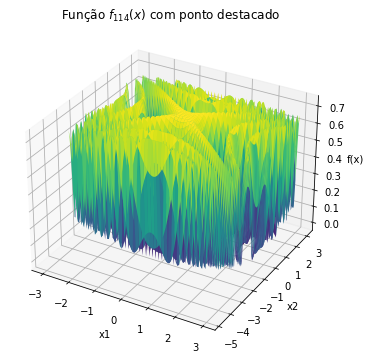

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def f114(x1, x2):
    return 0.5 + (np.sin(np.cos(np.abs(x1**2 - x2**2)))**2 - 0.5)/(1 + 0.001*(x1**2 + x2**2)**2)

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f114(X1, X2)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')
ax.scatter([-0.64005098], [-4.74073768], [f114(-0.64005098, -4.74073768)], color='red', s=100)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
plt.title('Função $f_{114}(x)$ com ponto destacado')
plt.show()

## Exercício 3 - Função 142 - Streched V Sine Wave Function

Avaliar para diferentes valores de D

\
\begin{aligned}
f_{142}(\mathbf{x}) = \sum_{i=1}^{D-1} & \left(x_{i+1}^2 + x_i^2\right)^{0.25} \cdot \left[ \sin^2\left(50\left(x_{i+1}^2 + x_i^2\right)^{0.1}\right) + 0.1 \right]
\end{aligned}


In [17]:
import numpy as np
import time
from scipy.optimize import minimize
from autograd import grad, hessian
import autograd.numpy as anp

# Configurações
N_EXEC = 5  # Número de execuções para cálculo do tempo médio
DIMENSIONS = range(2, 7)  # Dimensões de 2 a 6

def f142(x):
    D = len(x)
    total = 0.0
    for i in range(D-1):
        term1 = (x[i]**2 + x[i+1]**2)**0.25
        term2 = anp.sin(50*(x[i+1]**2 + x[i]**2)**0.1)**2 + 0.1
        total += term1 * term2
    return total

# Gradiente e Hessiana automáticos
grad_f142 = grad(f142)
hess_f142 = hessian(f142)

methods = {
    "Nelder-Mead": {"method": "Nelder-Mead"},
    "BFGS": {"method": "BFGS", "jac": lambda x: np.array(grad_f142(x))},
    "Newton-CG": {"method": "Newton-CG", "jac": lambda x: np.array(grad_f142(x)), "hess": lambda x: np.array(hess_f142(x))},
    "trust-ncg": {"method": "trust-ncg", "jac": lambda x: np.array(grad_f142(x)), "hess": lambda x: np.array(hess_f142(x))},
    "trust-krylov": {"method": "trust-krylov", "jac": lambda x: np.array(grad_f142(x)), "hess": lambda x: np.array(hess_f142(x))},
    "trust-exact": {"method": "trust-exact", "jac": lambda x: np.array(grad_f142(x)), "hess": lambda x: np.array(hess_f142(x))},
}

# Dicionário para armazenar tempos de todas as execuções
all_times = {method: [] for method in methods.keys()}

for D in DIMENSIONS:
    print(f"\n{'='*70}")
    print(f"ANÁLISE PARA DIMENSÃO D = {D}")
    print(f"{'='*70}")
    
    # Executa N_EXEC vezes para estatísticas
    for exec_num in range(1, N_EXEC+1):
        np.random.seed(42 + exec_num)  # Semente diferente para cada execução
        x0 = np.random.uniform(-0.5, 0.5, D)
        
        if exec_num == 1:
            print(f"\nPonto inicial exemplo: {np.round(x0, 4)}")
            print(f"Ótimo global: {np.zeros(D)}\n")
        
        results = {}
        for name, opts in methods.items():
            try:
                start_time = time.time()
                res = minimize(f142, x0, **opts, options={"disp": False})
                elapsed_time = (time.time() - start_time) * 1000
                
                if exec_num == 1:  # Só mostra resultados detalhados na primeira execução
                    results[name] = {
                        "fval": res.fun,
                        "distance_to_optimum": np.linalg.norm(res.x - np.zeros(D)),
                        "nfev": res.nfev,
                        "njev": res.get("njev", None),
                        "nhev": res.get("nhev", None),
                        "time": elapsed_time,
                        "success": res.success
                    }
                
                # Armazena tempo para todas as execuções
                all_times[name].append(elapsed_time)
                
            except Exception as e:
                if exec_num == 1:
                    results[name] = {
                        "fval": np.nan,
                        "distance_to_optimum": np.nan,
                        "nfev": np.nan,
                        "njev": np.nan,
                        "nhev": np.nan,
                        "time": np.nan,
                        "success": False
                    }
                all_times[name].append(np.nan)
        
        # Mostra tabela apenas na primeira execução
        if exec_num == 1:
            header = (
                f"{'Método':<15} | {'f(x*)':>10} | "
                f"{'nfev':>6} | {'njev':>5} | {'nhev':>5} | "
                f"{'Tempo (ms)':>10} | {'Sucesso':>8} | {'Dist. Ótimo':>12}"
            )
            print(header)
            print("-" * len(header))
            
            for method, data in results.items():
                print(
                    f"{method:<15} | "
                    f"{data['fval']:10.4e} | "
                    f"{data['nfev'] if not np.isnan(data['nfev']) else 'N/A':6} | "
                    f"{data['njev'] if data['njev'] is not None and not np.isnan(data['njev']) else 'N/A':5} | "
                    f"{data['nhev'] if data['nhev'] is not None and not np.isnan(data['nhev']) else 'N/A':5} | "
                    f"{data['time'] if not np.isnan(data['time']) else 'N/A':10.2f} | "
                    f"{str(data['success']):>8} | "
                    f"{data['distance_to_optimum']:12.6f} | "
                )

# Ranking por tempo médio
print(f"\n{'='*70}")
print(f"==== RANKING FINAL POR TEMPO MÉDIO (baseado em {N_EXEC*len(DIMENSIONS)} execuções) ====")
print(f"{'='*70}")

# Filtra métodos com pelo menos uma execução válida
valid_methods = {k: v for k, v in all_times.items() if not all(np.isnan(t) for t in v)}
sorted_methods = sorted(valid_methods.items(), key=lambda x: np.nanmean(x[1]))

for rank, (method, times) in enumerate(sorted_methods, start=1):
    valid_times = [t for t in times if not np.isnan(t)]
    print(
        f"{rank}. {method:<15} - "
        f"Média: {np.nanmean(times):.2f} ms | "
        f"Melhor: {np.nanmin(times):.2f} ms | "
        f"Pior: {np.nanmax(times):.2f} ms | "
        f"Execuções válidas: {len(valid_times)}/{len(times)}"
    )

# Métodos que falharam em todas as execuções
failed_methods = [k for k in all_times if k not in valid_methods]
if failed_methods:
    print("\nMétodos que falharam em todas as execuções:")
    for method in failed_methods:
        print(f"- {method}")

print("\nTeste concluído para dimensões de 2 a 6")


ANÁLISE PARA DIMENSÃO D = 2

Ponto inicial exemplo: [-0.3849  0.1091]
Ótimo global: [0. 0.]

Método          |      f(x*) |   nfev |  njev |  nhev | Tempo (ms) |  Sucesso |  Dist. Ótimo
--------------------------------------------------------------------------------------------
Nelder-Mead     | 6.0293e-02 |     64 | N/A   | N/A   |       0.00 |     True |     0.363457 | 
BFGS            | 5.5284e-03 |     17 |    17 | N/A   |      15.62 |     True |     0.003052 | 
Newton-CG       | 2.5105e-01 |      4 |     4 |     3 |      15.65 |     True |     6.302118 | 
trust-ncg       | 6.0293e-02 |      8 |     6 |     5 |      22.10 |     True |     0.363457 | 
trust-krylov    | 6.0293e-02 |      8 |     8 |     5 |      31.25 |     True |     0.363457 | 
trust-exact     | 6.0293e-02 |     13 |     7 |    13 |      46.89 |     True |     0.363457 | 

ANÁLISE PARA DIMENSÃO D = 3

Ponto inicial exemplo: [-0.3849  0.1091 -0.3666]
Ótimo global: [0. 0. 0.]

Método          |      f(x*) |   nfev |

**Conclusões:**

**->** De acordo com o "RANK FINAL POR TEMPO MÉDIO" e os valores de "Dist. Ótimo", percebi que o método **BFGS** foi o melhor custo beneficio em performace de tempo médio de execução e precisão em convergir dimensões mais altas (D=6).

**->** Nenhum método alcançou o ótimo global (f(x*)=0) em nenhuma dimensão

**->** Percebi que por ser uma função com Senos e Cosenos (plot abaixo mostra a função em um dos pontos iniciais de teste), possui regiões com altas curvaturas e assim os metodos sempre convergiram para um ponto local minimo entre 0.003 e 0.333.


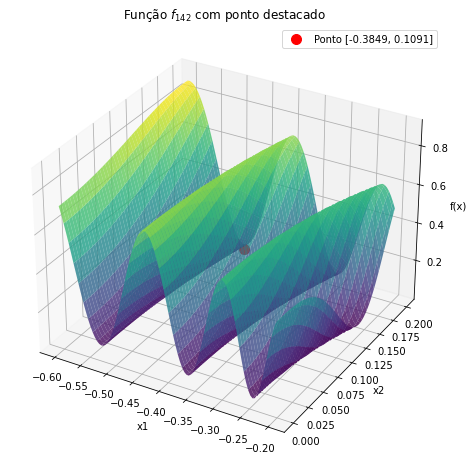

Valor da função no ponto: 0.3813


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f142(x):
    sum_sq = x[1]**2 + x[0]**2
    return (sum_sq**0.25) * (np.sin(50*(sum_sq**0.1))**2 + 0.1)

# Ponto de interesse
x_point = [-0.3849, 0.1091]
z_point = f142(x_point)

# Grade para visualização
x = np.linspace(-0.6, -0.2, 100)
y = np.linspace(0.0, 0.2, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([f142([xi, yi]) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

# Plot 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter([x_point[0]], [x_point[1]], [z_point], color='r', s=100, label='Ponto [-0.3849, 0.1091]')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
ax.set_title('Função $f_{142}$ com ponto destacado')
plt.legend()
plt.show()

print(f"Valor da função no ponto: {z_point:.4f}")

## Exercício 4 - Função 61 - Hansen

A partir de diferentes pontos iniciais, encontrar ao menos dois dos mínimos globais.

$$
f_{61}(\mathbf{x}) = \sum_{i=0}^{4} (i + 1)\cos(ix_1 + i + 1) + \sum_{j=0}^{4} (j + 1)\cos((j + 2)x_2 + j + 1)
$$

In [20]:
# import numpy as np
import time
from scipy.optimize import minimize
from scipy.spatial.distance import euclidean
from autograd import grad, hessian
import autograd.numpy as anp

# Função de Hansen
def hansen_function(x):
    x1, x2 = x
    sum1 = anp.sum([(i + 1) * anp.cos(i * x1 + i + 1) for i in range(5)])
    sum2 = anp.sum([(j + 1) * anp.cos((j + 2) * x2 + j + 1) for j in range(5)])
    return sum1 + sum2

# Gradiente e Hessiana
grad_hansen = grad(hansen_function)
hess_hansen = hessian(hansen_function)

# Métodos de otimização
methods = {
    "Nelder-Mead": {"method": "Nelder-Mead"},
    "BFGS": {"method": "BFGS", "jac": lambda x: np.array(grad_hansen(x))},
    "Newton-CG": {"method": "Newton-CG", "jac": lambda x: np.array(grad_hansen(x)), "hess": lambda x: np.array(hess_hansen(x))},
    "trust-ncg": {"method": "trust-ncg", "jac": lambda x: np.array(grad_hansen(x)), "hess": lambda x: np.array(hess_hansen(x))},
    "trust-krylov": {"method": "trust-krylov", "jac": lambda x: np.array(grad_hansen(x)), "hess": lambda x: np.array(hess_hansen(x))},
    "trust-exact": {"method": "trust-exact", "jac": lambda x: np.array(grad_hansen(x)), "hess": lambda x: np.array(hess_hansen(x))},
}

# Pontos Minimos globais
global_minima_points = [
    [-7.589893, -7.708314],  # Mínimo global 1
    [-7.589893, 4.85805],    # Mínimo global 2
    [4.976478, -7.708314],   # Mínimo global 3
    [4.976478, 4.85805],     # Mínimo global 4
    [-1.306708, -7.708314],  # Mínimo global 5
    [-1.306708, 4.85805],    # Mínimo global 6
    [-7.589893, -1.425128],  # Mínimo global 7
    [-7.589893, 1.425128],   # Mínimo global 8
    [4.976478, -1.425128],   # Mínimo global 9
    [4.976478, 1.425128]     # Mínimo global 10
]

# Pontos iniciais estratégicos
x0_list = [
    [-7.589, -7.708],  # Perto de 1 mínimos
    [-7.5, -1.4],     # Perto de 2 mínimos
    [4.976, -1.425],     # Perto de 3 mínimos
    [-1.3, -7.7],    # Outro mínimo direto
    [4.976470, 4.858050],      # Outro mínimo direto
]

N_EXEC = len(x0_list)

print("==== Pontos iniciais utilizados ====")
for i, x0 in enumerate(x0_list):
    print(f"{i+1}. x0 = {x0}")
print("="*40)

all_times = {m: [] for m in methods}

# Execução
for i, x0 in enumerate(x0_list):
    print(f"\n==== Execução {i+1}/{N_EXEC} | x0 = {x0} ====\n")
    header = f"{'Método':<20} | {'f(x*)':>12} | {'nfev':>6} | {'njev':>6} | {'nhev':>6} | {'Tempo (ms)':>12} | {'Success':>8} | {'Dist. Ótimo':>10}"
    print(header)
    print("-" * len(header))

    for name, opts in methods.items():
        start_time = time.time()
        res = minimize(lambda x: hansen_function(x), x0, **opts, options={"disp": False})
        elapsed_time = (time.time() - start_time) * 1000

        all_times[name].append(elapsed_time)

        fval = round(res.fun, 8)
        found_x = res.x
        distances = [euclidean(found_x, gm) for gm in global_minima_points]
        min_distance = min(distances)

        print(f"{name:<20} | {fval:12.4e} | {res.nfev:6d} | "
              f"{res.get('njev', ' N/A'):>6} | {res.get('nhev', ' N/A'):>6} | "
              f"{elapsed_time:12.2f} | {str(res.success):>8} | {min_distance:10.6f}")

# Ranking por tempo
print(f"\n==== Ranking final por tempo médio (baseado em {N_EXEC} execuções) ====")
sorted_methods = sorted(all_times.items(), key=lambda x: np.mean(x[1]))
for rank, (method, times) in enumerate(sorted_methods, start=1):
    print(f"{rank}. {method:<15} - Média: {np.mean(times):.2f} ms")


==== Pontos iniciais utilizados ====
1. x0 = [-7.589, -7.708]
2. x0 = [-7.5, -1.4]
3. x0 = [4.976, -1.425]
4. x0 = [-1.3, -7.7]
5. x0 = [4.97647, 4.85805]

==== Execução 1/5 | x0 = [-7.589, -7.708] ====

Método               |        f(x*) |   nfev |   njev |   nhev |   Tempo (ms) |  Success | Dist. Ótimo
------------------------------------------------------------------------------------------------------
Nelder-Mead          |  -1.7243e+01 |     64 |    N/A |    N/A |        15.63 |     True |   0.896130
BFGS                 |  -2.2898e+01 |     31 |     31 |    N/A |        53.43 |     True |   0.955863
Newton-CG            |  -2.2898e+01 |     28 |     28 |     10 |        84.62 |     True |   0.955863
trust-ncg            |  -2.2898e+01 |      8 |      7 |      6 |        46.86 |     True |   0.955862
trust-krylov         |  -2.2898e+01 |      4 |      4 |      3 |        37.75 |     True |   0.955862
trust-exact          |  -2.2898e+01 |      4 |      4 |      4 |        15.63 | 

**Conclusões:**

**->** Aparentemente a funçao possui multiplos minimos locais, pois diferentes métodos convergem para diferentes mínimos mesmo partindo do mesmo ponto inicial

**->** Neste problema os metodos de trust-exact e trust-krylov mostraram boa perfomance.

**->** Os pontos (-7.589, -7.708) tendem a convergir para -2.2898e+01 e os pontos (4.97647, 4.85805) para -1.7243e+01